In [1]:
# biosignalsnotebooks python package
import biosignalsnotebooks as bsnb

# Scientific packages
from numpy import linspace, max, min, average, std, sum, sqrt, where, argmax
from scipy.integrate import cumtrapz
from scipy.signal import welch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load of data
relative_file_path = "C:\ISB_GRUPO 1\Fuerza oponente.h5"
data, header = bsnb.load(relative_file_path, get_header=True)

In [3]:
channel = list(data.keys())[0]
device = header["device"]
resolution = int(header["resolution"][0])

In [4]:
# Sampling frequency and acquired data
fs = header["sampling rate"]

# Signal Samples
signal = bsnb.raw_to_phy("EMG", device, data[channel], resolution, option="mV") # Conversion to mV
time = linspace(0, len(signal) / fs, len(signal))

In [5]:
burst_begin, burst_end = bsnb.detect_emg_activations(signal, fs, smooth_level=20, threshold_level=10, 
                                                     time_units=True, plot_result=True)[:2]

Number of Muscular Activations : 3

In [6]:
# Bursts Duration
bursts_time = burst_end - burst_begin

# Parameter extraction
max_time = max(bursts_time)
min_time = min(bursts_time)
avg_time = average(bursts_time)
std_time = std(bursts_time)

In [7]:
# Mostrar los resultados
print("[Maximum, Minimum, Average] duration of Muscular Activations =", [max_time, min_time, avg_time], "s")
print("Standard Deviation =", std_time, "s")

[Maximum, Minimum, Average] duration of Muscular Activations = [10.247209554387615, 6.543133806417309, 7.923828708153541] s
Standard Deviation = 1.6525811889567965 s


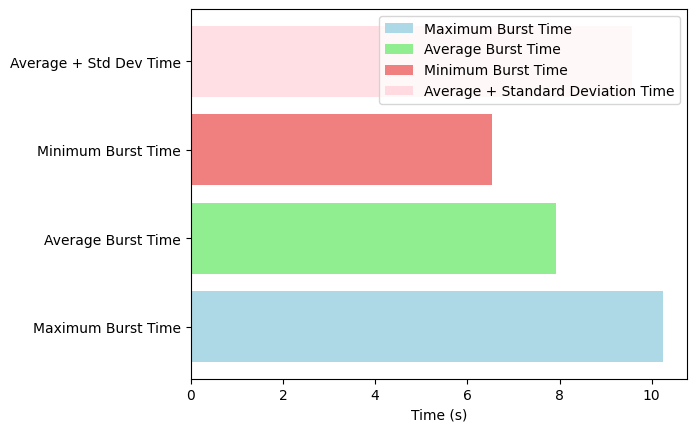

In [8]:
# Crear el gráfico
fig, ax = plt.subplots()
bar_width = 0.2

# Posiciones de las barras
positions = [0, 0.25, 0.5, 0.75]

# Crear barras
ax.barh(positions[0], max_time, height=bar_width, color='lightblue', label='Maximum Burst Time')
ax.barh(positions[1], avg_time, height=bar_width, color='lightgreen', label='Average Burst Time')
ax.barh(positions[2], min_time, height=bar_width, color='lightcoral', label='Minimum Burst Time')
ax.barh(positions[3], avg_time + std_time, height=bar_width, color='pink', alpha=0.5, label='Average + Standard Deviation Time')

# Etiquetas y leyenda
ax.set_xlabel('Time (s)')
ax.set_yticks(positions)
ax.set_yticklabels(['Maximum Burst Time', 'Average Burst Time', 'Minimum Burst Time', 'Average + Std Dev Time'])
ax.legend()

plt.show()


In [9]:
# Maximum
max_sample_value = max(signal)

# Minimum
min_sample_value = min(signal)

# Average and Standard Deviation
avg_sample_value = average(signal)
std_sample_value = std(signal)

time_param_dict = {"Maximum EMG": max_sample_value, "Minimum EMG": min_sample_value, 
                   "Average EMG": avg_sample_value, "Standard Deviation EMG": std_sample_value}

In [10]:
print("[Maximum, Minimum, Average, Standart Deviation] mV =", [max_sample_value, min_sample_value, avg_sample_value,std_sample_value], "mV")


[Maximum, Minimum, Average, Standart Deviation] mV = [156.3738850346878, 61.93632309217047, 102.23816441900199, 6.1957645662886405] mV


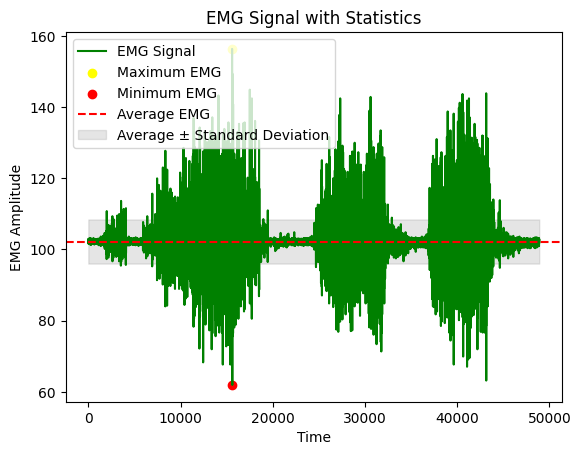

In [11]:
# Create time axis (assuming you have sampling rate or time data)
time_axis = np.arange(len(signal))  # Adjust if you have different time data

# Plot signal (green)
plt.plot(time_axis, signal, label='EMG Signal', color='green')

# Plot maximum EMG (yellow circle)
plt.scatter(time_axis[np.argmax(signal)], max_sample_value, label='Maximum EMG', marker='o', color='yellow')

# Plot minimum EMG (red circle)
plt.scatter(time_axis[np.argmin(signal)], min_sample_value, label='Minimum EMG', marker='o', color='red')

# Plot average EMG (dashed red line)
plt.axhline(y=avg_sample_value, color='red', linestyle='--', label='Average EMG')

# Plot average + standard deviation (gray rectangle)
upper_bound = avg_sample_value + std_sample_value
lower_bound = avg_sample_value - std_sample_value
plt.fill_between(time_axis, upper_bound, lower_bound, alpha=0.2, color='gray', label='Average ± Standard Deviation')

# Add labels, title, and legend
plt.xlabel('Time')
plt.ylabel('EMG Amplitude')
plt.title('EMG Signal with Statistics')
plt.legend()

# Display the plot
plt.show()

In [12]:
# Root Mean Square
rms = sqrt(sum(signal * signal) / len(signal))

# Area under the curve
area = cumtrapz(signal)

In [13]:
print("Root Mean Square =", rms , "mV")
print("Area =", area , "mV.s")

Root Mean Square = 102.42572802927867 mV
Area = [1.02205154e+02 2.04308102e+02 3.06411051e+02 ... 4.99913911e+06
 4.99924132e+06 4.99934373e+06] mV.s


In [14]:
# Signal Power Spectrum
f, P = welch(signal, fs=fs, window='hanning', noverlap=0, nfft=int(256.))

# Total Power and Median Frequency (Frequency that divides the spectrum into two regions with equal power)
area_freq = cumtrapz(P, f, initial=0)
total_power = area_freq[-1]
median_freq = f[where(area_freq >= total_power / 2)[0][0]]
f_max = f[argmax(P)]

In [15]:
print("Total Power =", total_power )
print("[Median Frequency, Maximum Power Frequency]   =", [median_freq,f_max] , "Hz")

Total Power = 38.85419850457387
[Median Frequency, Maximum Power Frequency]   = [58.59375, 42.96875] Hz
